# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=a8db34bbdfaa89a9f114c11ce184f0174f98345f56a88eea131b5a1b9c7b08e2
  Stored in directory: c:\users\brand\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#for city in cities:
#    city_name = city.replace(" ", "%20")

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#set up variables to be needed later
url = "http://api.openweathermap.org/data/2.5/weather?q="
url
#print(requests.get(url))
units = "imperial"
city_no = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []
country = []
date_time = []
weather_json = []
weather_city = []
city_check = []
import time
page=0


#find all necessary data for each city in the cities list
for city in cities:
   
    query_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    #print(query_url)
    weather_response = requests.get(query_url).json()
    #handle exceptions/errors
    try:
        weather_response["weather"]
    except KeyError:
        print(f'no {city} data is available')
        continue
    #append lists with new data
    lat.append(weather_response['coord']['lat'])
    long.append(weather_response['coord']['lon'])
    temp.append(weather_response['main']['temp'])
    humidity.append(weather_response['main']['humidity'])
    cloud.append(weather_response['clouds']['all'])
    wind.append(weather_response['wind']['speed'])
    country.append(weather_response['sys']['country'])
    date_time.append(weather_response['dt'])
    weather_city.append(city)

    print(f'Name: {weather_response["name"]} ID: {weather_response["id"]}')
        

no nizhneyansk data is available
Name: Koppa ID: 1266155
Name: Upernavik ID: 3418910
Name: Dikson ID: 1507390
Name: Port Moresby ID: 2088122
Name: Lichinga ID: 1043893
Name: Albany ID: 5106841
Name: Arraial do Cabo ID: 3471451
Name: Sault Ste. Marie ID: 6141439
Name: Acapulco de Juárez ID: 3533462
Name: Punta Arenas ID: 3874787
Name: Rūdsar ID: 118191
Name: Bāli Chak ID: 1277581
no lolua data is available
Name: West Point ID: 4450753
Name: George Town ID: 1735106
Name: Atuona ID: 4020109
Name: Strathpeffer ID: 2651245
Name: Barrow ID: 5880054
Name: Batemans Bay ID: 2176639
Name: Busselton ID: 2075265
Name: Rikitea ID: 4030556
Name: Castro ID: 3466704
Name: Vaini ID: 4032243
Name: Mae Sai ID: 1152194
Name: Bredasdorp ID: 1015776
Name: Nanortalik ID: 3421765
Name: Binzhou ID: 1816336
no rawannawi data is available
Name: Waldoboro ID: 4982044
Name: Medvezh'yegorsk ID: 527888
Name: Atherton ID: 2656847
Name: Shingū ID: 1847947
Name: Bluff ID: 2206939
Name: Hermanus ID: 3366880
Name: Cidrei

Name: Marsá Maţrūḩ ID: 352733
Name: Gallup ID: 5468773
no qingan data is available
Name: Vestmannaeyjar ID: 3412093
Name: Obo ID: 236950
Name: Gamba ID: 2400547
Name: Alexandria ID: 361058
Name: Shagonar ID: 1492499
Name: Nizwá ID: 286987
Name: Moussoro ID: 2427336
Name: Mora ID: 2225991
Name: Karonga ID: 235715
Name: Musoma ID: 152451
Name: Nikolskoye ID: 546105
Name: Kwinana ID: 2068079
Name: Keuruu ID: 652977
Name: Kieta ID: 2094027
Name: Bilma ID: 2446796
Name: Hazorasp ID: 1513957
Name: Vardø ID: 777019
Name: Oussouye ID: 2246901
Name: Bubaque ID: 2374583
no bolungarvik data is available
Name: Lyskovo ID: 532715
Name: Yayva ID: 468560
Name: Santa Rosa ID: 1687894
Name: Guerrero Negro ID: 4021858
Name: Santa Cruz de la Sierra ID: 3904906
Name: Hambantota ID: 1244926
Name: Dakar ID: 2253354
Name: Santa Vitória do Palmar ID: 3449747
Name: Bulungu ID: 2316259
Name: Chidambaram ID: 1274256
no tsihombe data is available
no samusu data is available
Name: Korčula ID: 3197710
Name: Cedar C

Name: Ciudad del Carmen ID: 3530599
Name: Havelock ID: 4470244
Name: Mikhaylovka ID: 527012
Name: Gangarampur ID: 1271670
Name: Lorengau ID: 2092164
Name: Chegdomyn ID: 2025579
Name: Hurghada ID: 361291
Name: Falun ID: 2715459
Name: Goderich ID: 5962442
Name: Srednekolymsk ID: 2121025
Name: Saint-Michel-des-Saints ID: 6138802
Name: Saldanha ID: 3361934
Name: Koumac ID: 2140558
Name: Touros ID: 3386213
Name: Corn Island ID: 3620266
Name: Meadow Lake ID: 5478673
Name: Bourail ID: 2141714
Name: Kāgal ID: 1268651
Name: Sergeevka ID: 1519385
Name: Henties Bay ID: 3356832
Name: Corinth ID: 259289
Name: Newport ID: 2641598
Name: Uyuni ID: 3901903
Name: Safi ID: 2537881
Name: Cairns ID: 2172797
Name: Kudahuvadhoo ID: 1337607
Name: Aného ID: 2367990
Name: Comodoro Rivadavia ID: 3860443
Name: Wāngjing ID: 1252964
Name: Socorro ID: 5530932
Name: Mandalgovi ID: 2030065
Name: Port-Gentil ID: 2396518


In [7]:
#create dictionary to use for later tasks
weather_dict = {
    "city": weather_city,
    "lat": lat,
    "long": long,
    "temp": temp,
    "humidity": humidity,
    "cloud": cloud,
    "wind": wind,
    "country":country,
    "date and time":date_time
}



In [8]:
#check lengths of each dictionary
print(len(weather_city))
print(len(lat))
print(len(temp))
print(len(humidity))
print(len(cloud))
print(len(wind))

585
585
585
585
585
585


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data_df = pd.DataFrame(data=weather_dict)

weather_data_df.to_csv('output.csv', index=False)
weather_data_df

,city,lat,long,temp,humidity,cloud,wind,country,date and time
0,koppa,13.5304,75.3633,66.36,70,0,1.77,IN,1615145247
1,upernavik,72.7868,-56.1549,-17.39,83,0,12.57,GL,1615145247
2,dikson,73.5069,80.5464,-16.33,88,100,10.36,RU,1615145247
3,port moresby,-9.4431,147.1797,73.40,100,20,5.75,PG,1615145247
4,lichinga,-13.3128,35.2406,65.19,100,90,11.50,MZ,1615145215
...,...,...,...,...,...,...,...,...,...
580,comodoro rivadavia,-45.8667,-67.5000,73.40,43,40,36.82,AR,1615145239
581,wangjing,24.6000,94.0333,54.84,66,13,0.81,IN,1615145382
582,socorro,31.6546,-106.3033,64.36,27,20,5.75,US,1615145382
583,mandalgovi,45.7625,106.2708,28.22,79,0,5.86,MN,1615145383


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#look for cities that have humidity of more than 100%
weather_data_df.loc[weather_data_df['humidity']>100]

#originally looked at box and whisker plot to see data, then checked a different way
#fig1, ax1 = plt.subplots()
#ax1.set_title('City')
#ax1.set_ylabel('Humidity')
#ax1.boxplot(humidity)
#plt.show()

,city,lat,long,temp,humidity,cloud,wind,country,date and time


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

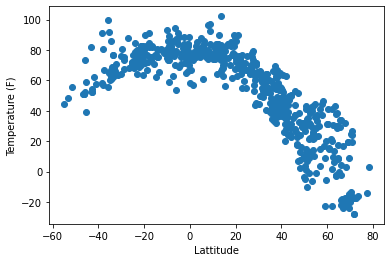

This graph shows how the temperature is related to the lattitude. In the both hemispheres,
the closer you are to the equator (lattitude 0), the higher your temperature. In the Northern hemisphere,
since it is winter, it gets much colder as you go closer to the North pole, while in the Southern hemisphere
since it is summer, the change is not as drastic. Also, there are not any cities that could be pulled close
to the South Pole since there are no cities in Antarctica.


In [19]:
import scipy.stats as st
plt.scatter(lat,temp)
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')

plt.show()
print(f'This graph shows how the temperature is related to the lattitude. In the both hemispheres,')
print(f'the closer you are to the equator (lattitude 0), the higher your temperature. In the Northern hemisphere,')
print(f'since it is winter, it gets much colder as you go closer to the North pole, while in the Southern hemisphere')
print(f'since it is summer, the change is not as drastic. Also, there are not any cities that could be pulled close')
print('to the South Pole since there are no cities in Antarctica.')

## Latitude vs. Humidity Plot

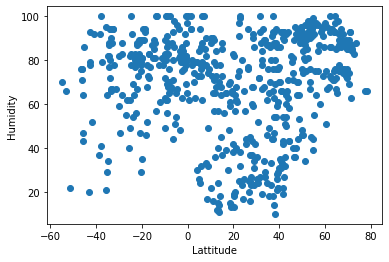

This graph shows that the humidity and lattitude of each city that was analyzed. Since humidity typically
deals with one of two things, how close you are to the coast or what your daily weather is, more than lattitude,
this variabilty is not surprising.


In [17]:
plt.scatter(lat,humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')

plt.show()
print(f'This graph shows that the humidity and lattitude of each city that was analyzed. Since humidity typically')
print(f'deals with one of two things, how close you are to the coast or what your daily weather is, more than lattitude,')
print(f'this variabilty is not surprising.')

## Latitude vs. Cloudiness Plot

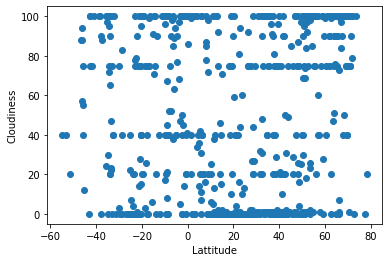

This plot analyzes cloudiness and lattitude. It seems to imply that most of the cloudiness is measure by percent
cloud cover which is why there are lines at each of the multiples of 20 or 25. It is easy to measure by saying 20
or 25 percent cloud cover.


In [21]:
plt.scatter(lat, cloud)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')

plt.show()
print(f'This plot analyzes cloudiness and lattitude. It seems to imply that most of the cloudiness is measure by percent')
print(f'cloud cover which is why there are lines at each of the multiples of 20 or 25. It is easy to measure by saying 20')
print(f'or 25 percent cloud cover.')

## Latitude vs. Wind Speed Plot

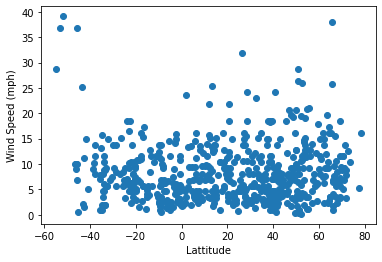

This plot shows wind speeds as it correlates to lattitude. While there are some interesting standouts, this will not
show the typical correlation most people will look for. Winds tend to be stronger along certain latitude lines, but
since they are also a factor of day to day weather, they do not tend to stand out the way people look for them.
You can see some groupings and some higher winds along those lattitude lines where the winds are usually stronger,
such as between the 35 and 55 degree lines, and lighter winds near the equator, but so many other factors are at play
it is hard to really tell what is going on.


In [25]:
plt.scatter(lat,wind)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')

plt.show()
print(f'This plot shows wind speeds as it correlates to lattitude. While there are some interesting standouts, this will not')
print(f'show the typical correlation most people will look for. Winds tend to be stronger along certain latitude lines, but')
print(f'since they are also a factor of day to day weather, they do not tend to stand out the way people look for them.')
print(f'You can see some groupings and some higher winds along those lattitude lines where the winds are usually stronger,')
print(f'such as between the 35 and 55 degree lines, and lighter winds near the equator, but so many other factors are at play')
print(f'it is hard to really tell what is going on.')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

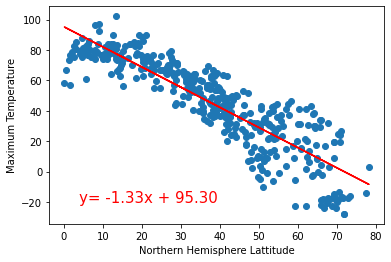

This graph shows a negative correlation between temperature and lattitude. As you move further away from the
equator, the temperature goes down. As it is winter in the Northern Hemisphere, this is to be expected.


In [27]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')
plt.show()
print(f'This graph shows a negative correlation between temperature and lattitude. As you move further away from the')
print(f'equator, the temperature goes down. As it is winter in the Northern Hemisphere, this is to be expected.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

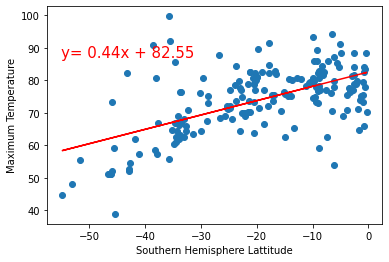

This graph does not show as much of a correlation as the one for the Northern Hemisphere, which also makes sense,
considering it is summer in the Southern Hemisphere. For Earth, the Sun is directly overhead at 23.5 degrees South
of the equator, which is why the temperatures go up from the more negative (closer to the poles) lattitudes towards
the 23.5 degrees, and then some of the temperatures start to decrease slightly.


In [29]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')
plt.show()
print(f'This graph does not show as much of a correlation as the one for the Northern Hemisphere, which also makes sense,')
print(f'considering it is summer in the Southern Hemisphere. For Earth, the Sun is directly overhead at 23.5 degrees South')
print(f'of the equator, which is why the temperatures go up from the more negative (closer to the poles) lattitudes towards')
print(f'the 23.5 degrees, and then some of the temperatures start to decrease slightly.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

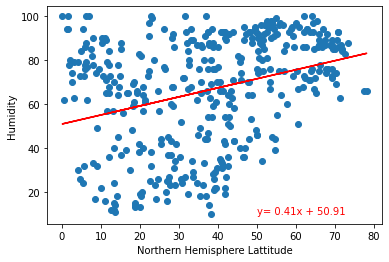

This graph shows a correlation between humidity and the distance from the equator. Since warm air can hold more
moisture, there is a much wider variety of humidities near the equator than closer to the poles. Since other variables
also affect humidity, how close you are to the coast or if you have rain that day because of a storm, the range in
humidity near the equator can be expected.


In [31]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Humidity')
plt.show()
print(f'This graph shows a correlation between humidity and the distance from the equator. Since warm air can hold more')
print(f'moisture, there is a much wider variety of humidities near the equator than closer to the poles. Since other variables')
print(f'also affect humidity, how close you are to the coast or if you have rain that day because of a storm, the range in')
print(f'humidity near the equator can be expected.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

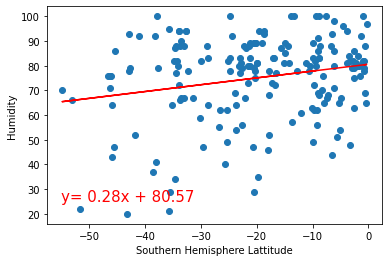

This graph shows less correlation between humidity and lattitude than the Northern Hemisphere, although the humidity
is much higher near the equator overall since the warmer air can hold more moisture.


In [33]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Humidity')
plt.show()
print(f'This graph shows less correlation between humidity and lattitude than the Northern Hemisphere, although the humidity')
print(f'is much higher near the equator overall since the warmer air can hold more moisture.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

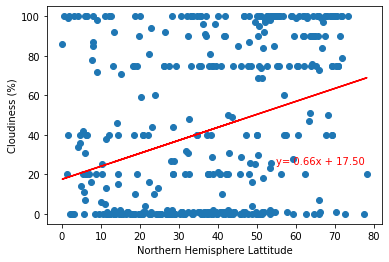

This graph shows little correlation between cloud cover and lattitude. There seems to be mostly just 100 percent
or 0 percent cloud cover


In [35]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55, 25),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print(f'This graph shows little correlation between cloud cover and lattitude. There seems to be mostly just 100 percent')
print(f'or 0 percent cloud cover')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

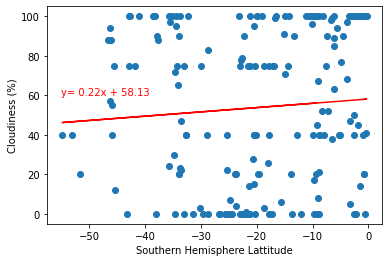

In [36]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=10,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print(f'This graph shows less cloud cover than in the Northern Hemisphere overall. There are not as many places where there')
print(f'are completely cloudless skies, but there is a wide range of various cloud cover in the Southern Hemisphere.)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

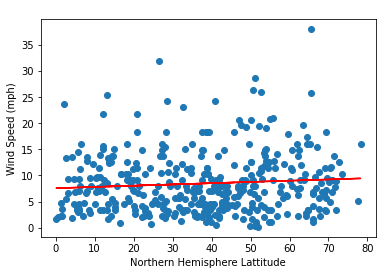

This graph shows that wind speeds are not really changed by distance from the equator for the Northern Hemisphere.


In [38]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,40),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f'This graph shows that wind speeds are not really changed by distance from the equator for the Northern Hemisphere.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

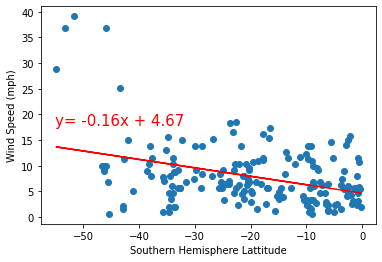

This graph shows that the winds in the Southern Hemisphere tend to decrease as you get closer to the equator. Winds
at the equator tend to be fairly calm unless there is a storm, so this makes sense.


In [41]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f'This graph shows that the winds in the Southern Hemisphere tend to decrease as you get closer to the equator. Winds')
print(f'at the equator tend to be fairly calm unless there is a storm, so this makes sense.')